In [1]:
from IPython.display import Image, display

# **Regressão Linear - Plástico**

# **[VÍDEO](https://www.youtube.com/watch?v=Vk8SHDVclRU)**

## Objetivo

- O modelo foi aplicado com o objetivo de predizer valores futuros da produção anual, vazamento ao oceano e reciclagem de plástico, dos anos 2020 a 2050, para avaliar o quão preocupante será a situação da má administração do lixo futuramente, no caso da continuação dos procedimentos de tratamento e manejamento do lixo como foram dos anos 2000 a 2019.

## Bases de Dados

- Para realização das predições foram utilizadas 3 bases de dados diferentes, todas retiradas do site [Our World Data](https://ourworldindata.org/), artigo [Plastic Pollution](https://ourworldindata.org/plastic-pollution?insight=plastic-production-has-more-than-doubled-in-the-last-two-decades#key-insights):

1.   [Global plastics production](https://ourworldindata.org/grapher/global-plastics-production)

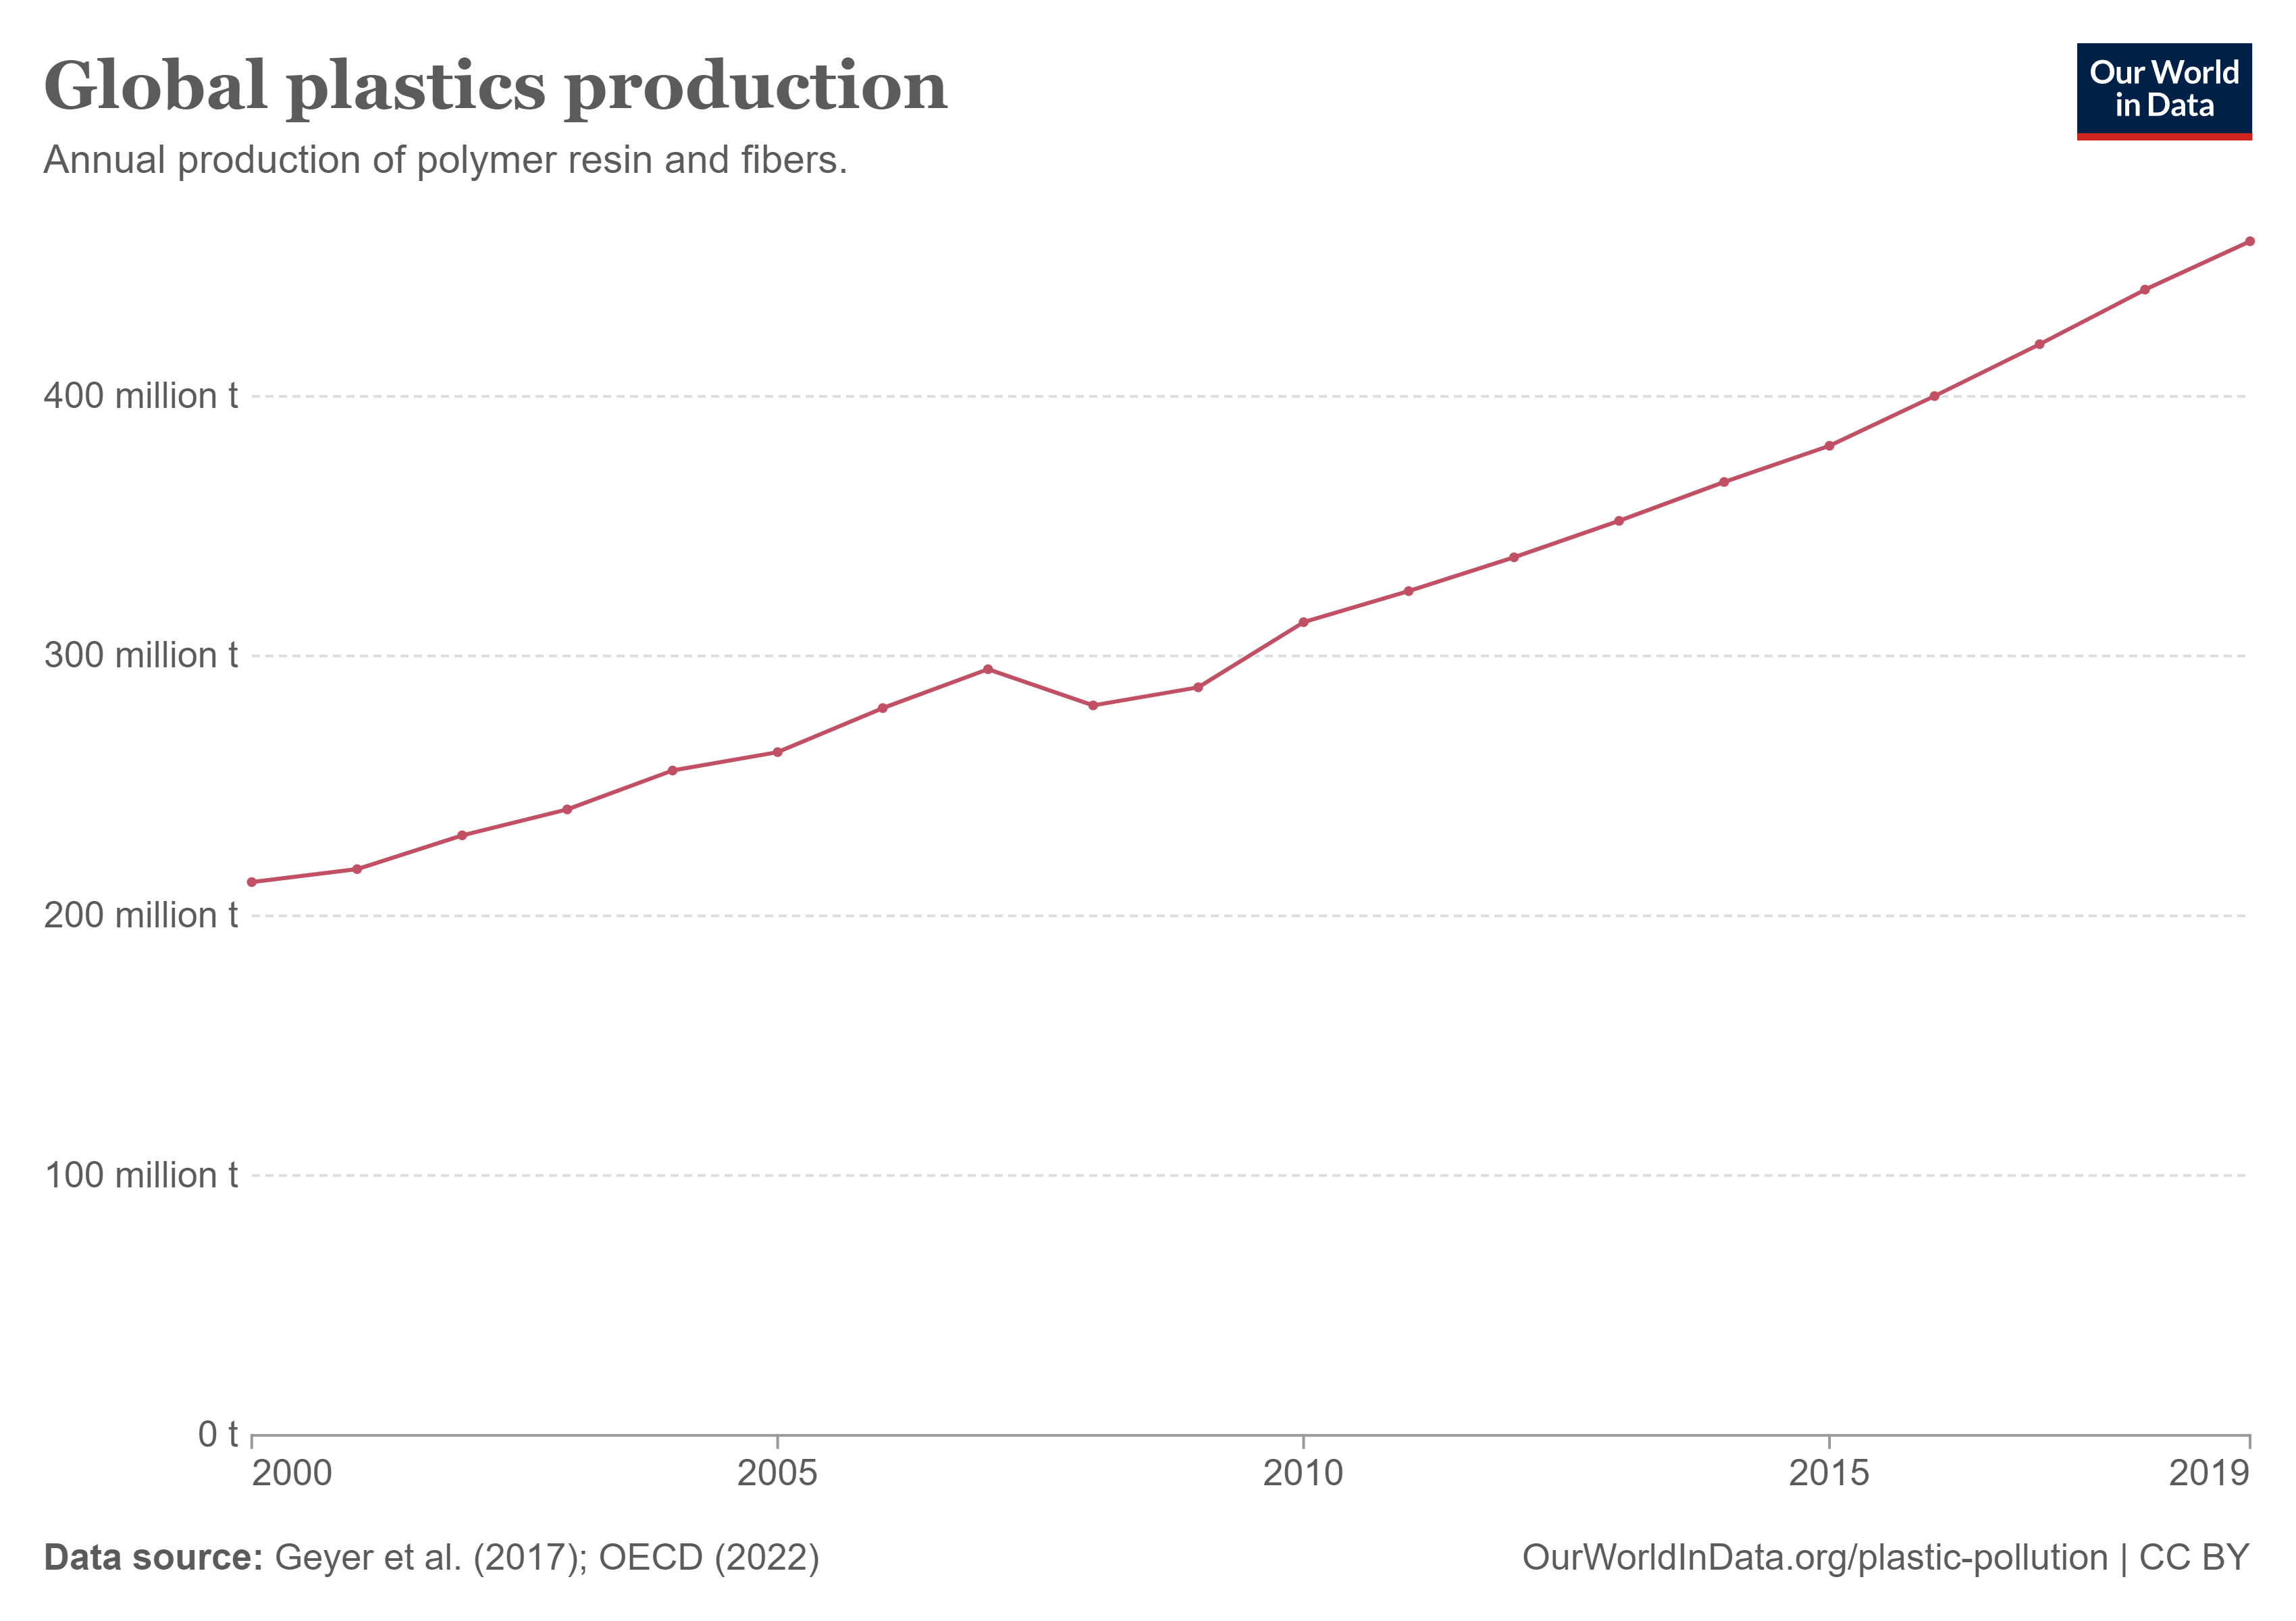

In [2]:
display(Image(filename="/content/global-plastics-production.png", width=800, height=500))

2.   [Annual plastic waste by disposal method, World, 2000 to 2019](https://ourworldindata.org/grapher/plastic-fate)

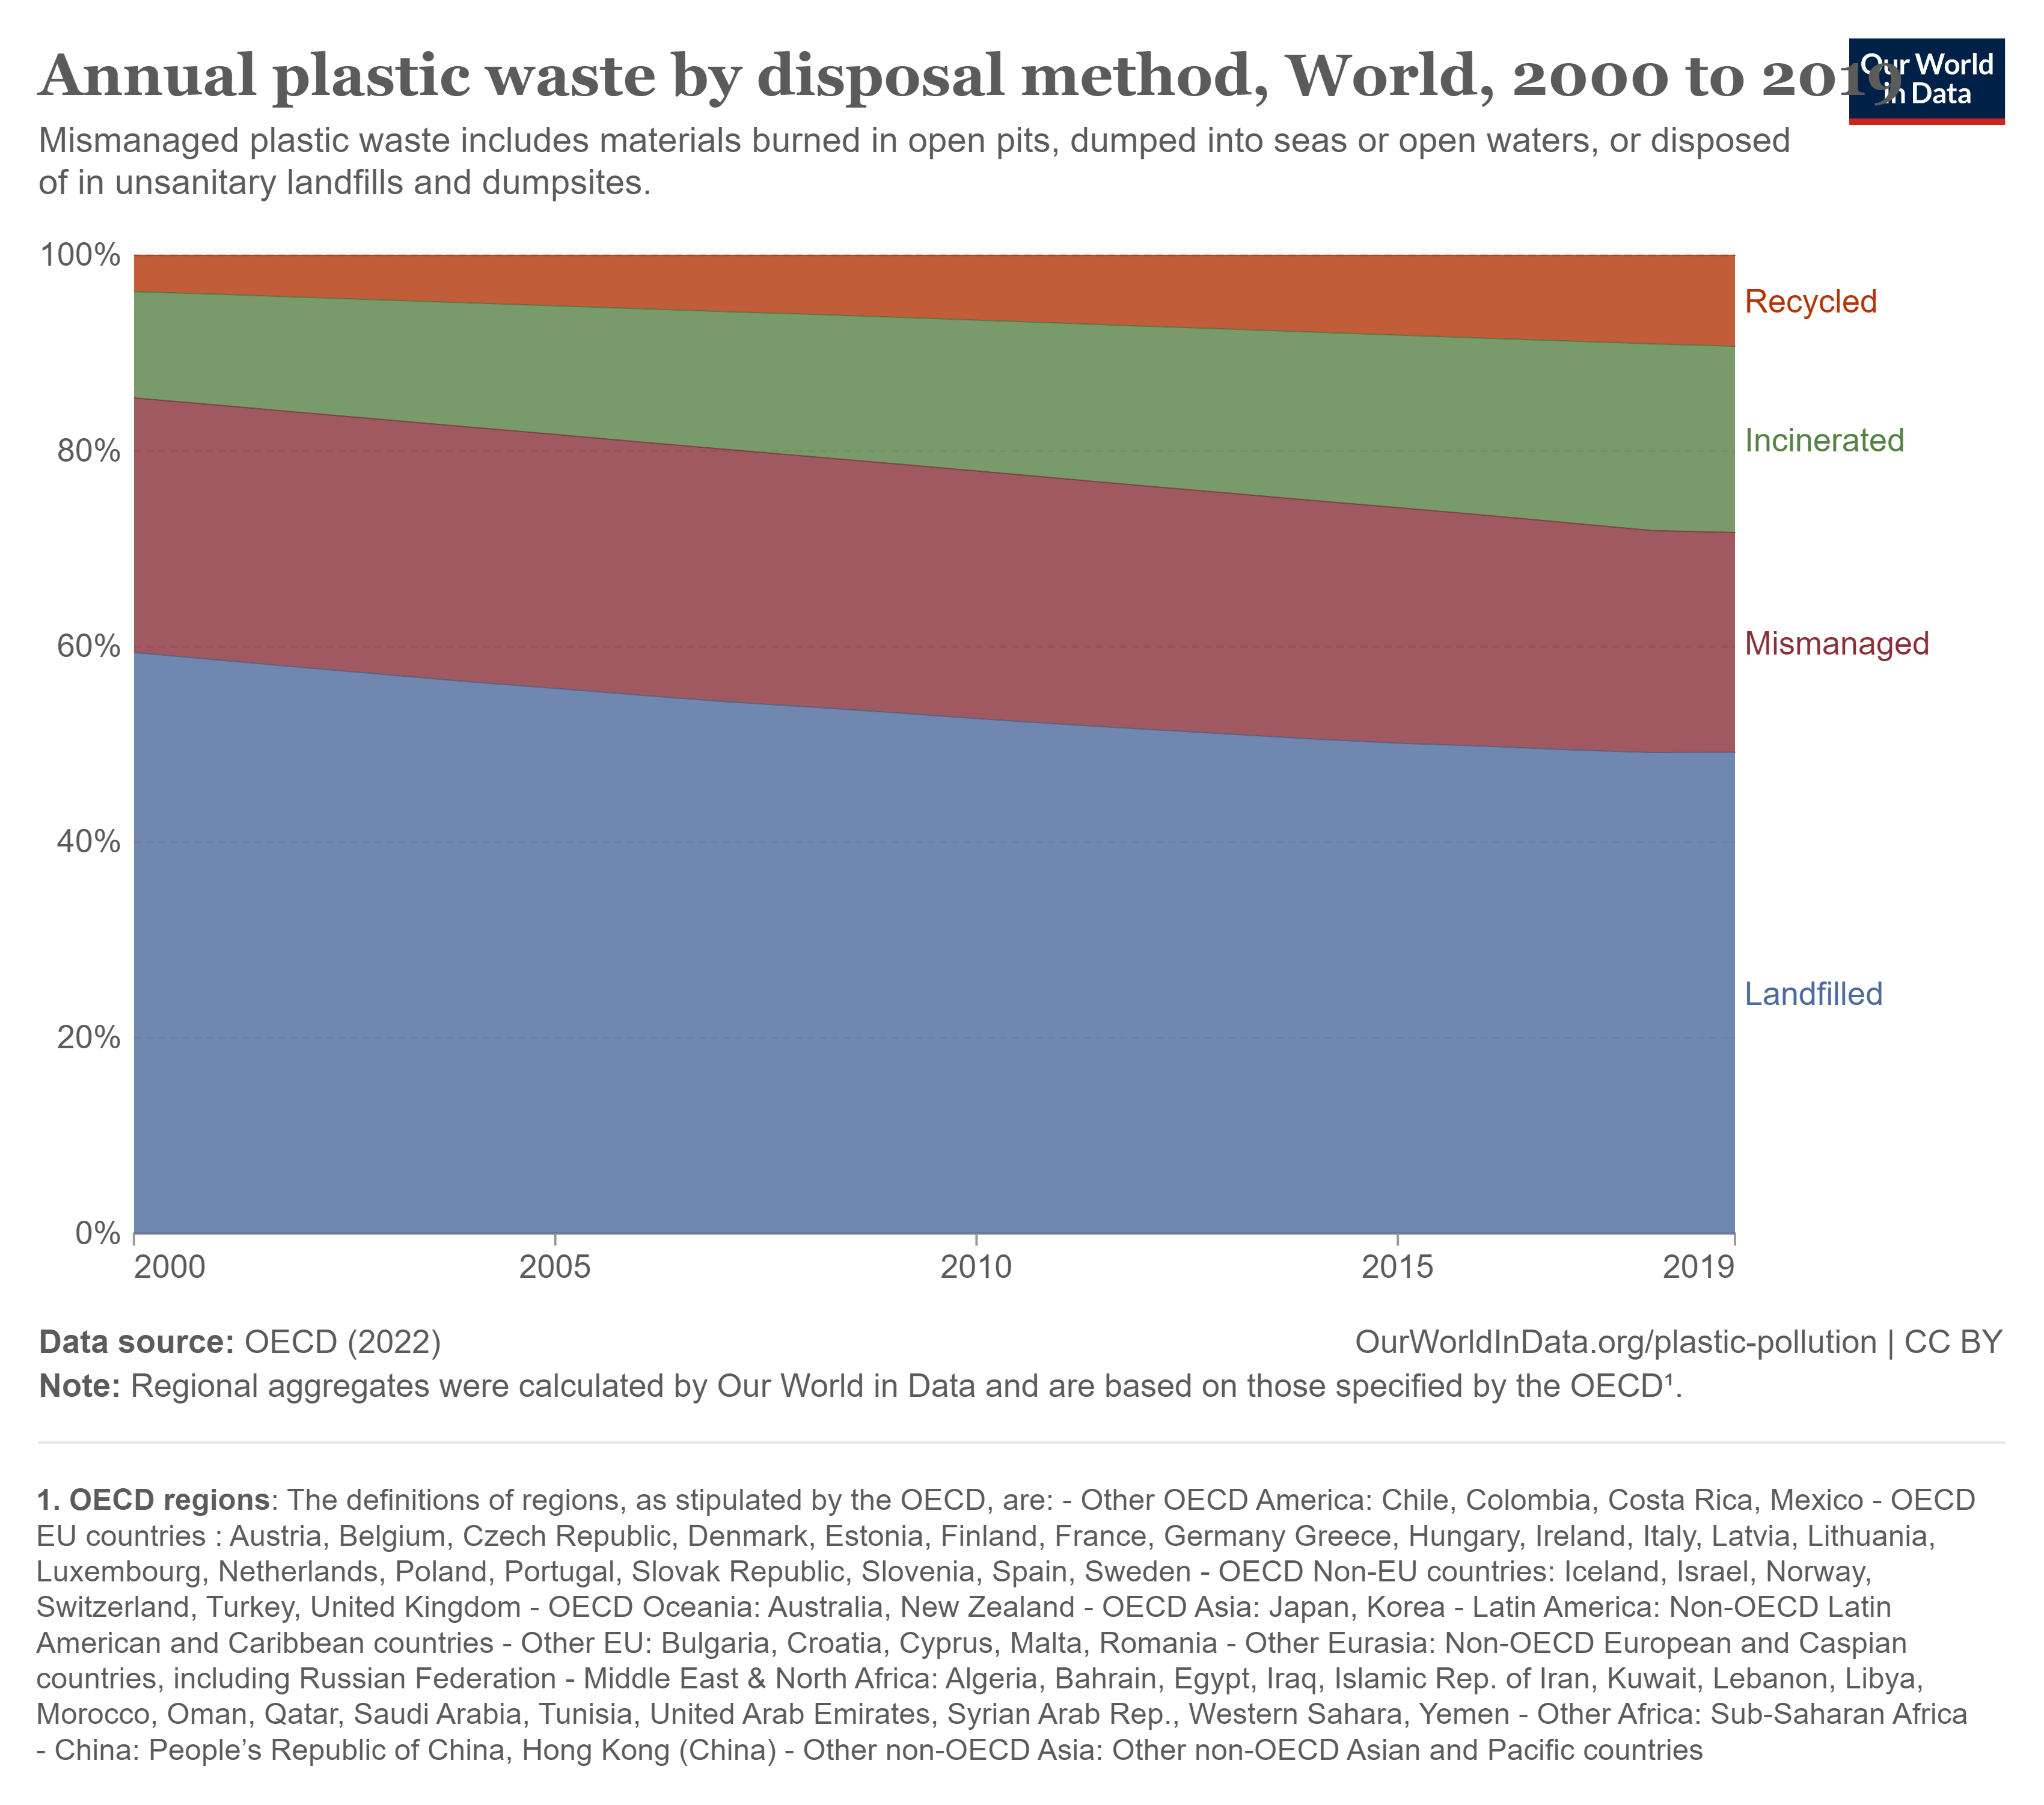

In [3]:
display(Image(filename="/content/plastic-fate.png", width=800, height=500))

3.  [Plastic waste accumulated in the oceans, 2000 to 2019 ](https://ourworldindata.org/grapher/plastic-waste-accumulated-in-oceans)

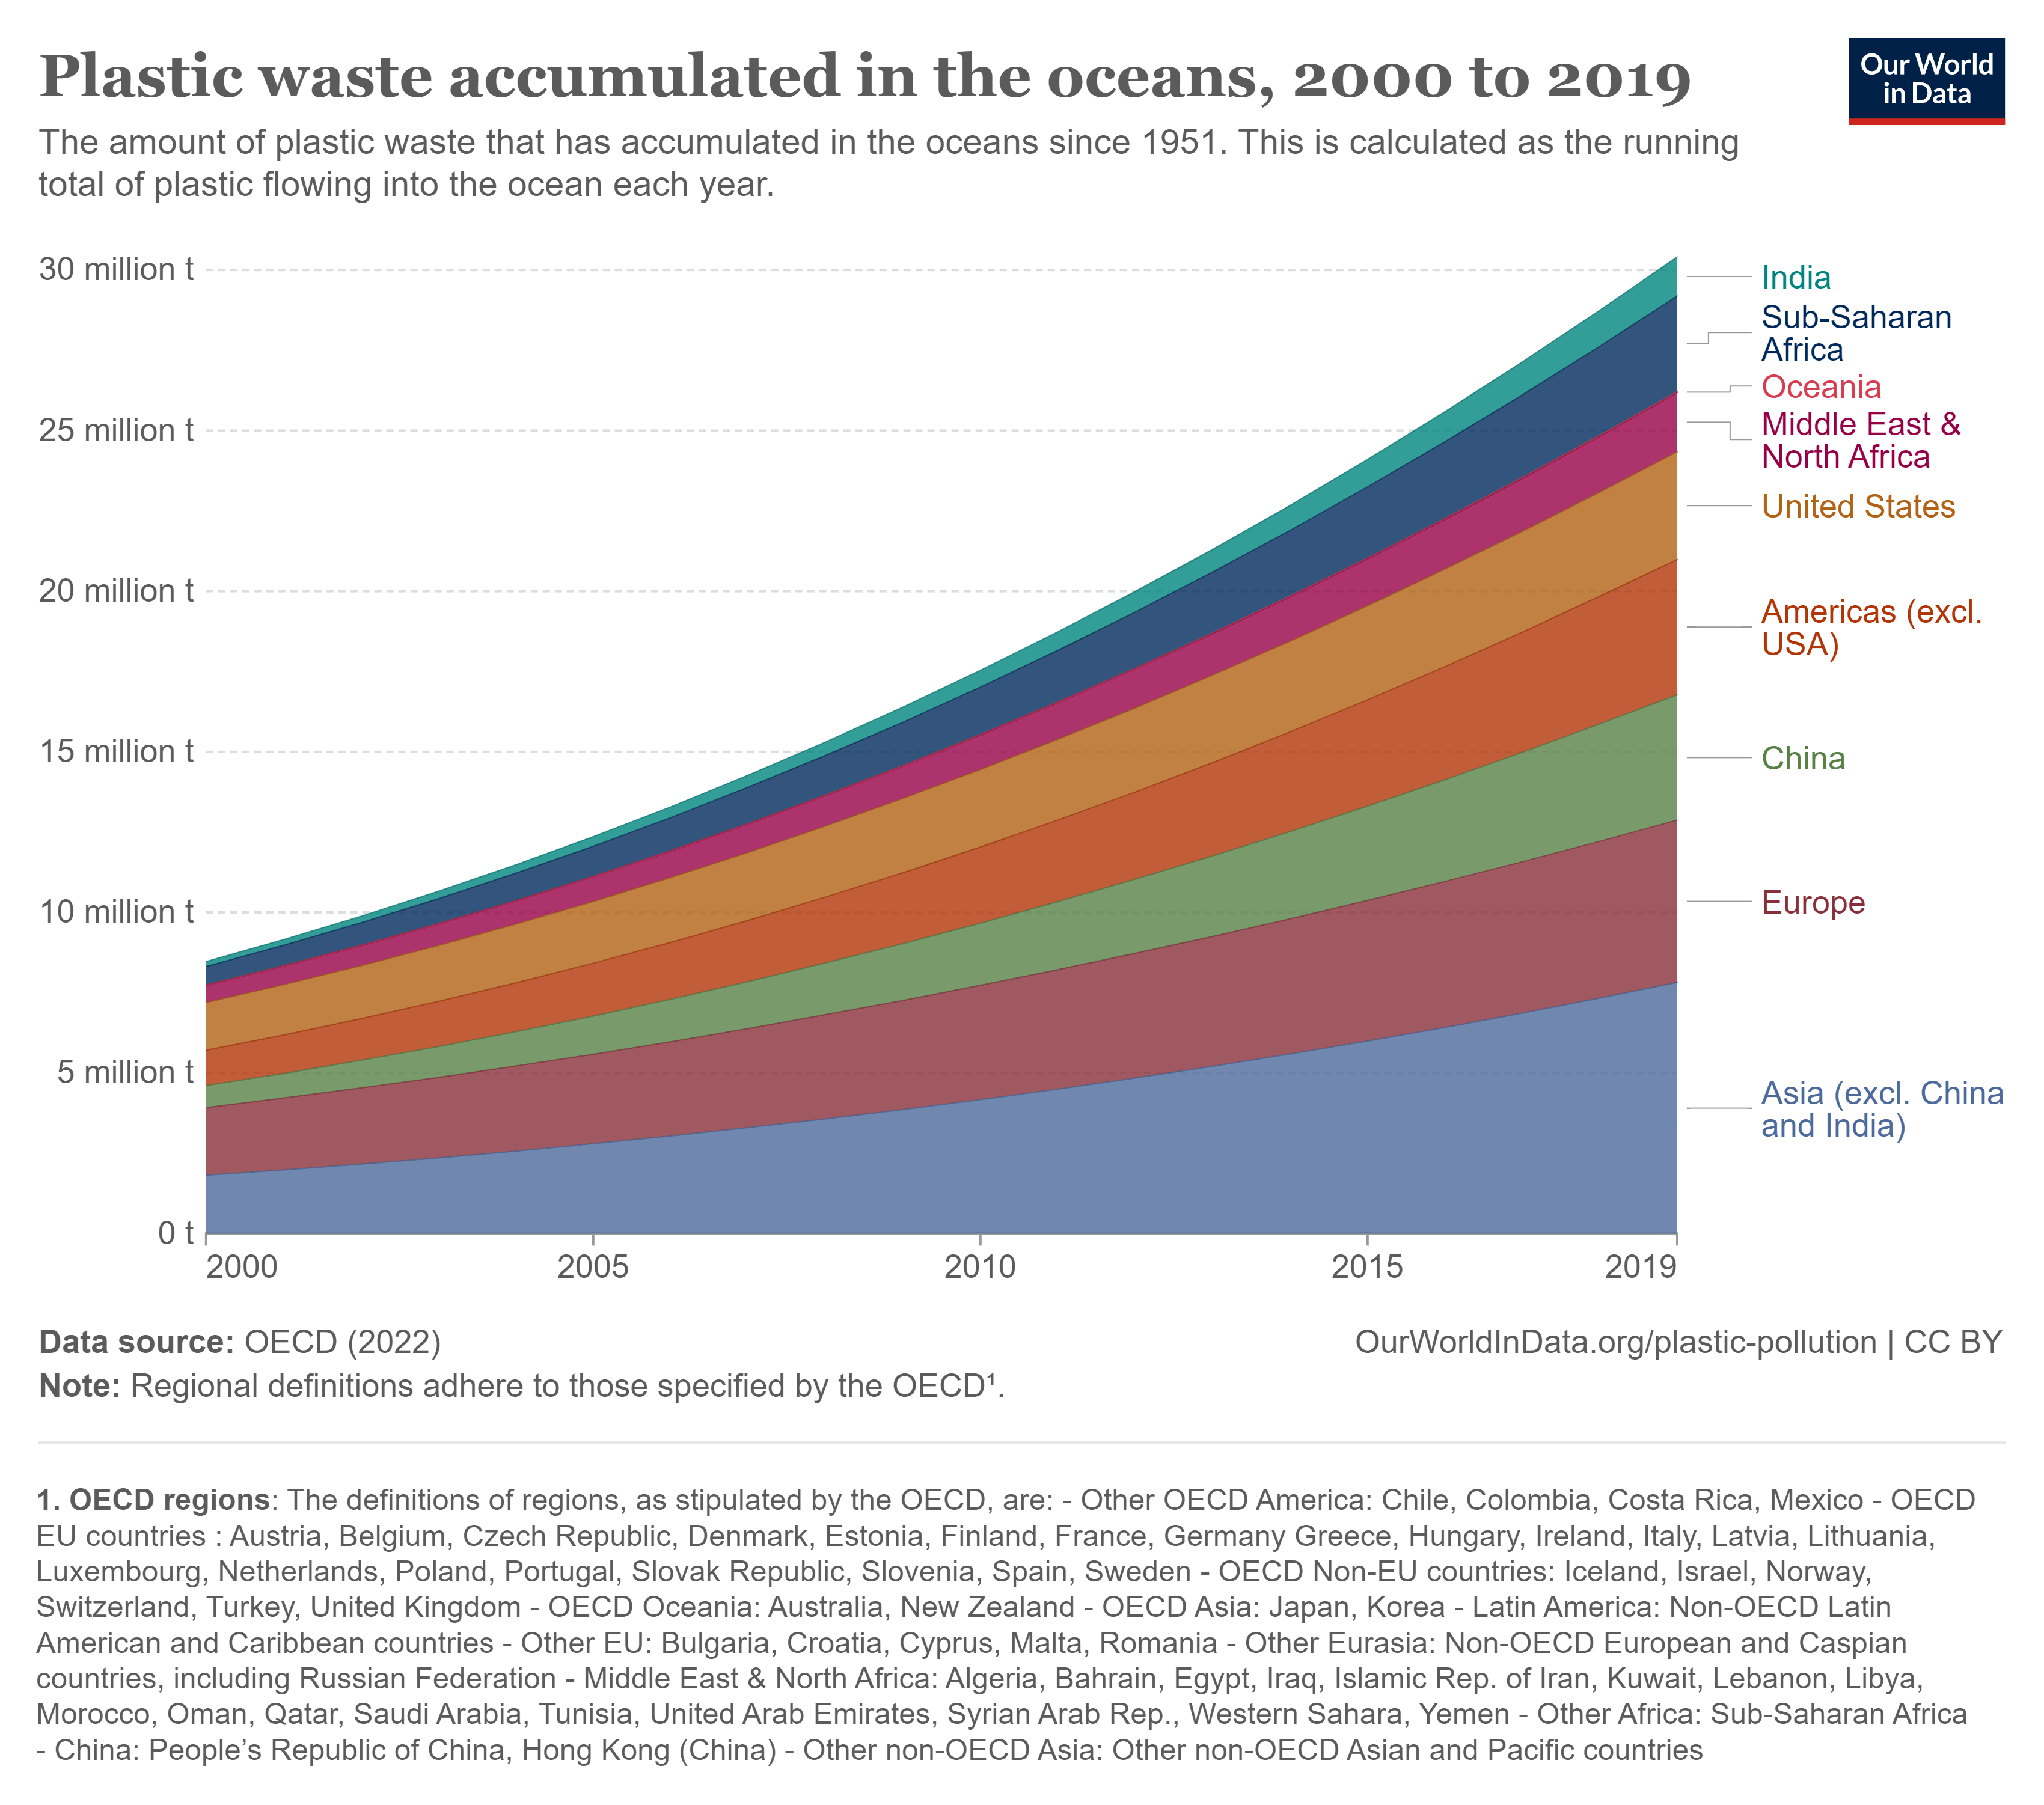

In [4]:
display(Image(filename="/content/plastic-waste-accumulated-in-oceans.png", width=800, height=500))

## Tratamento

- Para utilizar os dados das 3 bases, foram retirados os anos 1950 a 1999 do dataset de produção de plástico e separada para uso, somente as linhas contendo dados mundiais dos datasets de plástico acumulado no oceano e desperdício de plástico por método de despejo.

- Após isso, foram escolhidas as colunas ano, produção anual de plastico, vazamento de plástico ao oceano e plástico reciclado, adicionadas em um único dataset.

- Por fim, considerando baixa a quantidade de dados (somente 20 linhas de cada coluna), foi realizado um processo para adicionar uma coluna de meses, estimando o valor de cada mês com base na diferença entre um ano e o anterior, aumentando assim a base de treinamento de 20 linhas para 240.

## Treinamento do Algoritmo de Regressão

- Foi criado uma terceira coluna 'Time' para agrupar os dados de ano e mês, simplificando a separação dos dados X para o treinamento.

- Logo após, foi aplicado o algoritmo LinearRegression para cada um dos 3 dados indicados à previsão (Plastic Leakage, Plastic Production e Recycled Plastic).

- Ao final, as predições foram agrupadas em um único dataset de resultado, e foram adicionadas duas colunas de porcentagem dos valores de Recycled Plastic e Plastic Leakage, em relação ao valor de Plastic Production (100%).

## Tecnologias Utilizadas

1.   [Pandas](https://pandas.pydata.org/) - Utilizado para administração das Bases de dados em formato DataFrame;
2.   [Sikit-Learn](https://scikit-learn.org/stable/) - Utilizado para aplicação do modelo de Regressão Linear e obtenção das predições;
3.   [NumPy](https://numpy.org/) - Utilizado para simplificar as criação das colunas de ano e mês nos dataframes de resultado
4.   [MatPlotLib](https://matplotlib.org/) - Utilizado para apresentação dos resultados em gráficos

# **IMPORTS**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Dataset

In [6]:
df = pd.read_csv('/content/df_final.csv')

In [7]:
df.drop(['Code'], axis=1, inplace=True )
df.drop(['Entity'], axis=1, inplace=True )

In [8]:
df

,Year,Recycled,Incinerated,Littered and mismanaged,Landfilled,Annual plastic production between 1950 and 2019,Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans
0,2000,5783667.0,16980004.0,40635292,92773420.0,213000000,8471748.0
1,2001,6529903.0,18570814.0,42657704,96065190.0,218000000,9153952.0
2,2002,7439750.0,20530800.0,45354524,100721944.0,231000000,9881777.0
3,2003,8383408.0,22507442.0,47831170,104927940.0,241000000,10656836.0
4,2004,9459860.0,24743732.0,50646040,109797350.0,256000000,11481840.0
5,2005,10492602.0,26828640.0,52868510,113526520.0,263000000,12356893.0
6,2006,11721061.0,29326584.0,55713400,118502810.0,280000000,13285542.0
7,2007,13053889.0,32007148.0,58640348,123696620.0,295000000,14270018.0
8,2008,13923892.0,33589484.0,59203064,124444250.0,281000000,15304404.0
9,2009,15146142.0,35934470.0,61048170,127749080.0,288000000,16390133.0




---



**Tratamento geral dos anos e meses**


In [9]:
#Lista de anos e meses
years = range(2000, 2020)
months = range(1, 13)

#Criar DataFrame expandido
year_month_combinations = [(year, month) for year in years for month in months]
df_expanded = pd.DataFrame(year_month_combinations, columns=['Year', 'Month'])

In [10]:
#Adicionar a coluna 'Time' que combina ano e mês
df_expanded['Time'] = df_expanded['Year'] + (df_expanded['Month'] - 1) / 12

#Lista de colunas a serem interpoladas
columns_to_interpolate = [
    'Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans',
    'Annual plastic production between 1950 and 2019',
    'Recycled',
    'Landfilled'
]

In [11]:
# valores na ordem de 'plastic leakage' , 'Annual production', 'Recycled' e 'Landfilled'
#lista para inserção dos valores de 1999
valor_1999 = [7789544, 208000000, 5037431, 89481650]
i = 0
#Iterar sobre cada coluna e realizar a interpolação
for column in columns_to_interpolate:


    df['December_Value_Previous_Year'] = df[column].shift(1).fillna(valor_1999[i]) # teste de valor3
    i += 1

    # Calcular a diferença anual na quantidade de plástico, exceto para o ano de 2000

    df['Annual_Difference'] = df[column] - df['December_Value_Previous_Year']

    # Adicionar a diferença anual e o valor de dezembro do ano anterior ao DataFrame expandido
    df_expanded = pd.merge(df_expanded, df[['Year', 'December_Value_Previous_Year', 'Annual_Difference']], on='Year', how='left')

    # Calcular o incremento mensal
    df_expanded['Monthly_Increment'] = df_expanded['Annual_Difference'] / 12

    # Adicionar o valor mensal incremental ao valor de dezembro do ano anterior
    df_expanded[column] = df_expanded.groupby('Year')['Monthly_Increment'].cumsum() + df_expanded.groupby('Year')['December_Value_Previous_Year'].transform('first')

    # Converter para inteiro, se necessário
    df_expanded[column] = df_expanded[column].astype(int)

    # Remover colunas auxiliares
    df_expanded.drop(columns=['December_Value_Previous_Year', 'Annual_Difference', 'Monthly_Increment'], inplace=True)

In [12]:
df_expanded

,Year,Month,Time,Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans,Annual plastic production between 1950 and 2019,Recycled,Landfilled
0,2000,1,2000.000000,7846394,208416666,5099617,89755964
1,2000,2,2000.083333,7903244,208833333,5161803,90030278
2,2000,3,2000.166667,7960095,209250000,5223990,90304592
3,2000,4,2000.250000,8016945,209666666,5286176,90578906
4,2000,5,2000.333333,8073795,210083333,5348362,90853220
...,...,...,...,...,...,...,...
235,2019,8,2019.583333,29855066,453515726,32195133,171997556
236,2019,9,2019.666667,29993487,455073300,32353606,172457515
237,2019,10,2019.750000,30131907,456630873,32512078,172917473
238,2019,11,2019.833333,30270327,458188446,32670551,173377431




---


# **PLASTIC LEAKAGE**

---
## **Tratamento**
---



In [13]:
# Selecionar colunas relevantes para esse condicional
df_plastic = df_expanded[['Year', 'Month', 'Time', 'Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans']]

In [14]:
# Renomear colunas para facilitar
df_plastic.columns = ['Year', 'Month', 'Time', 'Plastic_Leakage']

In [15]:
df_plastic

,Year,Month,Time,Plastic_Leakage
0,2000,1,2000.000000,7846394
1,2000,2,2000.083333,7903244
2,2000,3,2000.166667,7960095
3,2000,4,2000.250000,8016945
4,2000,5,2000.333333,8073795
...,...,...,...,...
235,2019,8,2019.583333,29855066
236,2019,9,2019.666667,29993487
237,2019,10,2019.750000,30131907
238,2019,11,2019.833333,30270327




---




## **Regressão Linear**

###**Treinamento da regressão**


In [16]:
df = df_plastic

In [17]:
# Verificar valores ausentes
df.isna().sum()

Year               0
Month              0
Time               0
Plastic_Leakage    0
dtype: int64

In [18]:
# Separando features (X) e targets (y)
X = df[['Time']]
y = df['Plastic_Leakage']

In [19]:
df

,Year,Month,Time,Plastic_Leakage
0,2000,1,2000.000000,7846394
1,2000,2,2000.083333,7903244
2,2000,3,2000.166667,7960095
3,2000,4,2000.250000,8016945
4,2000,5,2000.333333,8073795
...,...,...,...,...
235,2019,8,2019.583333,29855066
236,2019,9,2019.666667,29993487
237,2019,10,2019.750000,30131907
238,2019,11,2019.833333,30270327


inicio de treino e teste, separação dos dados

In [20]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões para os dados de teste
y_pred = model.predict(X_test)

avaliando R2

In [21]:
# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²) do Modelo: {r2}")

Coeficiente de Determinação (R²) do Modelo: 0.9830304775611587


In [22]:
# Criar uma lista de anos e meses futuros
future_years = np.arange(2020, 2051)
future_months = np.arange(1, 13)
future_time_combinations = [(year, month) for year in future_years for month in future_months]

In [23]:
#onde inserimos 2019 para obtermos os valores corretos de 2020
future_time_combinations.insert(0, (2019, 12))

In [24]:
# Criar um DataFrame com essas combinações
future_df_leakage = pd.DataFrame(future_time_combinations, columns=['Year', 'Month'])

In [25]:
# Criar a coluna 'Time' para as previsões futuras
future_df_leakage['Time'] = future_df_leakage['Year'] + (future_df_leakage['Month'] - 1) / 12

In [26]:
# Fazer previsões para os valores futuros
future_X = future_df_leakage[['Time']]
future_df_leakage['Predicted_Plastic_Leakage'] = model.predict(future_X)

In [27]:
# Converter para inteiro
future_df_leakage['Predicted_Plastic_Leakage'] = future_df_leakage['Predicted_Plastic_Leakage'].astype(int)

In [28]:
# Ajustar a interceptação baseando-se no último valor conhecido
last_known_value = 30502643
model.intercept_ = last_known_value - model.coef_[0] * 2020

# Refazer as previsões com a interceptação ajustada
future_df_leakage['Predicted_Plastic_Leakage_Adjusted'] = model.predict(future_X).astype(int)

###**Resultado da regressão**


In [29]:
# Exibir as previsões ajustadas
future_df_leakage.head(30)

,Year,Month,Time,Predicted_Plastic_Leakage,Predicted_Plastic_Leakage_Adjusted
0,2019,12,2019.916667,28542968,30408747
1,2020,1,2020.000000,28636864,30502643
2,2020,2,2020.083333,28730760,30596538
3,2020,3,2020.166667,28824656,30690434
4,2020,4,2020.250000,28918552,30784330
5,2020,5,2020.333333,29012448,30878226
6,2020,6,2020.416667,29106344,30972122
7,2020,7,2020.500000,29200239,31066018
8,2020,8,2020.583333,29294135,31159914
9,2020,9,2020.666667,29388031,31253810


In [30]:
future_df_leakage.tail(30)

,Year,Month,Time,Predicted_Plastic_Leakage,Predicted_Plastic_Leakage_Adjusted
343,2048,7,2048.500000,60749254,62615033
344,2048,8,2048.583333,60843150,62708928
345,2048,9,2048.666667,60937046,62802824
346,2048,10,2048.750000,61030942,62896720
347,2048,11,2048.833333,61124838,62990616
348,2048,12,2048.916667,61218734,63084512
349,2049,1,2049.000000,61312629,63178408
350,2049,2,2049.083333,61406525,63272304
351,2049,3,2049.166667,61500421,63366200
352,2049,4,2049.250000,61594317,63460095


gráfico para visualizar a regressão linear

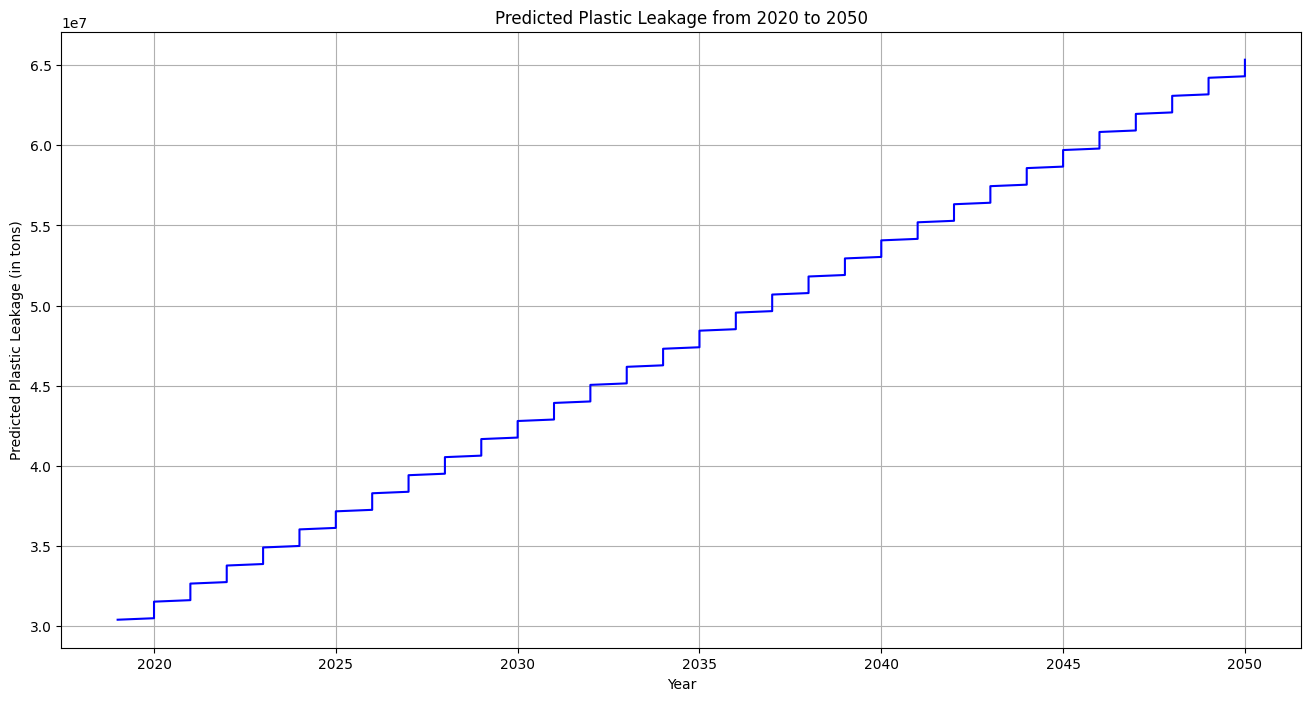

In [31]:
# Plot the predicted plastic leakage
plt.figure(figsize=(16, 8))
plt.plot(future_df_leakage['Year'], future_df_leakage['Predicted_Plastic_Leakage_Adjusted'], color='blue', label='Predicted Plastic Leakage')

# Set the title and axis labels
plt.title('Predicted Plastic Leakage from 2020 to 2050')
plt.xlabel('Year')
plt.ylabel('Predicted Plastic Leakage (in tons)')

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()




---

# **PRODUCTION**

##**Tratamento**

In [32]:
# Selecionar colunas relevantes para esse condicional
df_production  = df_expanded[['Year', 'Month', 'Time', 'Annual plastic production between 1950 and 2019']]

In [33]:
# Renomear colunas para facilitar
df_production.columns = ['Year', 'Month', 'Time', 'Plastic_Production']

In [34]:
df_production

,Year,Month,Time,Plastic_Production
0,2000,1,2000.000000,208416666
1,2000,2,2000.083333,208833333
2,2000,3,2000.166667,209250000
3,2000,4,2000.250000,209666666
4,2000,5,2000.333333,210083333
...,...,...,...,...
235,2019,8,2019.583333,453515726
236,2019,9,2019.666667,455073300
237,2019,10,2019.750000,456630873
238,2019,11,2019.833333,458188446


##**Regressão Linear**

###**Treinamento da regressão**


In [35]:
df = df_production

In [36]:
# Verificar valores ausentes
df.isna().sum()

Year                  0
Month                 0
Time                  0
Plastic_Production    0
dtype: int64

In [37]:
# Separando features (X) e targets (y)
X = df[['Time']]
y = df['Plastic_Production']

In [38]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões para os dados de teste
y_pred = model.predict(X_test)

In [39]:
# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²) do Modelo: {r2}")

Coeficiente de Determinação (R²) do Modelo: 0.9737410987518913


In [40]:
# Criar uma lista de anos e meses futuros
future_years = np.arange(2020, 2051)
future_months = np.arange(1, 13)
future_time_combinations = [(year, month) for year in future_years for month in future_months]

In [41]:
#onde inserimos 2019 para obtermos os valores corretos de 2020
future_time_combinations.insert(0, (2019, 12))

In [42]:
# Criar um DataFrame com essas combinações
future_df_production = pd.DataFrame(future_time_combinations, columns=['Year', 'Month'])

In [43]:
# Criar a coluna 'Time' para as previsões futuras
future_df_production['Time'] = future_df_production['Year'] + (future_df_production['Month'] - 1) / 12

In [44]:
# Fazer previsões para os valores futuros
future_X = future_df_production[['Time']]
future_df_production['Predicted_Plastic_Production'] = model.predict(future_X)

In [45]:
# Converter para inteiro
future_df_production['Predicted_Plastic_Production'] = future_df_production['Predicted_Plastic_Production'].astype(int)

In [46]:
# Ajustar a interceptação baseando-se no último valor conhecido
last_known_value = 460754577
model.intercept_ = last_known_value - model.coef_[0] * 2020

# Refazer as previsões com a interceptação ajustada
future_df_production['Predicted_Plastic_Production_Adjusted'] = model.predict(future_X).astype(int)

###**Resultado da regressão**


In [47]:
# Exibir as previsões ajustadas
future_df_production.head(30)

,Year,Month,Time,Predicted_Plastic_Production,Predicted_Plastic_Production_Adjusted
0,2019,12,2019.916667,432728023,459746019
1,2020,1,2020.000000,433736580,460754577
2,2020,2,2020.083333,434745138,461763134
3,2020,3,2020.166667,435753695,462771691
4,2020,4,2020.250000,436762252,463780248
5,2020,5,2020.333333,437770809,464788805
6,2020,6,2020.416667,438779367,465797363
7,2020,7,2020.500000,439787924,466805920
8,2020,8,2020.583333,440796481,467814477
9,2020,9,2020.666667,441805038,468823034


In [48]:
future_df_production.tail(30)

,Year,Month,Time,Predicted_Plastic_Production,Predicted_Plastic_Production_Adjusted
343,2048,7,2048.500000,778663159,805681155
344,2048,8,2048.583333,779671716,806689713
345,2048,9,2048.666667,780680274,807698270
346,2048,10,2048.750000,781688831,808706827
347,2048,11,2048.833333,782697388,809715384
348,2048,12,2048.916667,783705945,810723942
349,2049,1,2049.000000,784714503,811732499
350,2049,2,2049.083333,785723060,812741056
351,2049,3,2049.166667,786731617,813749613
352,2049,4,2049.250000,787740174,814758171


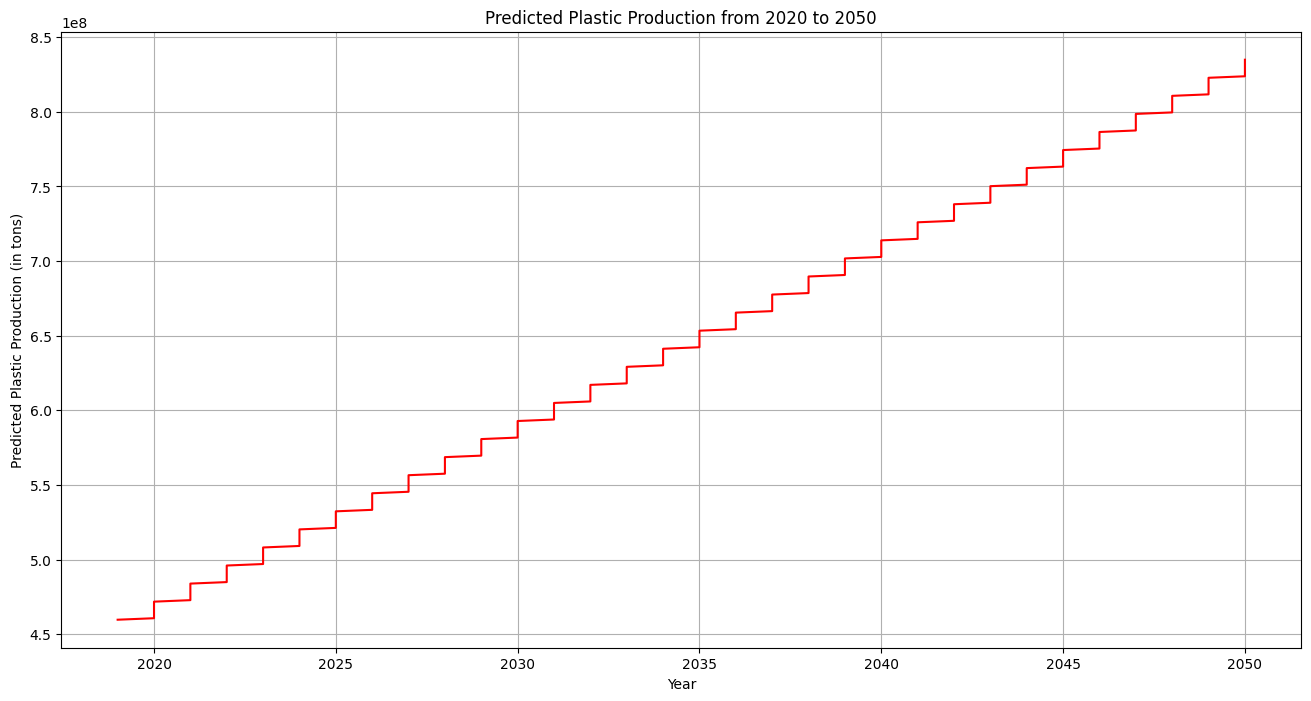

In [49]:
# Plot the predicted plastic Production
plt.figure(figsize=(16, 8))
plt.plot(future_df_production['Year'], future_df_production['Predicted_Plastic_Production_Adjusted'], color='red', label='Predicted Plastic Production')

# Set the title and axis labels
plt.title('Predicted Plastic Production from 2020 to 2050')
plt.xlabel('Year')
plt.ylabel('Predicted Plastic Production (in tons)')

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()


---

# **RECYCLED**

##**Tratamento**

In [50]:
# Selecionar colunas relevantes para esse condicional
df_recycled  = df_expanded[['Year', 'Month', 'Time', 'Recycled']]

In [51]:
df_recycled

,Year,Month,Time,Recycled
0,2000,1,2000.000000,5099617
1,2000,2,2000.083333,5161803
2,2000,3,2000.166667,5223990
3,2000,4,2000.250000,5286176
4,2000,5,2000.333333,5348362
...,...,...,...,...
235,2019,8,2019.583333,32195133
236,2019,9,2019.666667,32353606
237,2019,10,2019.750000,32512078
238,2019,11,2019.833333,32670551


##**Regressão Linear**

###**Treinamento da regressão**


In [52]:
df = df_recycled

In [53]:
# Verificar valores ausentes
df.isna().sum()

Year        0
Month       0
Time        0
Recycled    0
dtype: int64

In [54]:
# Separando features (X) e targets (y)
X = df[['Time']]
y = df['Recycled']

In [55]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões para os dados de teste
y_pred = model.predict(X_test)

In [56]:
# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²) do Modelo: {r2}")

Coeficiente de Determinação (R²) do Modelo: 0.9813289784058573


In [57]:
# Criar uma lista de anos e meses futuros
future_years = np.arange(2020, 2051)
future_months = np.arange(1, 13)
future_time_combinations = [(year, month) for year in future_years for month in future_months]

In [58]:
# Onde inserimos 2019 para obtermos os valores corretos de 2020
future_time_combinations.insert(0, (2019, 12))

In [59]:
# Criar um DataFrame com essas combinações
future_df_recycled = pd.DataFrame(future_time_combinations, columns=['Year', 'Month'])

In [60]:
# Criar a coluna 'Time' para as previsões futuras
future_df_recycled['Time'] = future_df_recycled['Year'] + (future_df_recycled['Month'] - 1) / 12

In [61]:
# Fazer previsões para os valores futuros
future_X = future_df_recycled[['Time']]
future_df_recycled['Predicted_Plastic_Recycled'] = model.predict(future_X)

In [62]:
# Converter para inteiro
future_df_recycled['Predicted_Plastic_Recycled'] = future_df_recycled['Predicted_Plastic_Recycled'].astype(int)

In [63]:
# Ajustar a interceptação baseando-se no último valor conhecido
last_known_value = 32945510
model.intercept_ = last_known_value - model.coef_[0] * 2020

# Refazer as previsões com a interceptação ajustada
future_df_recycled['Predicted_Plastic_Recycled_Adjusted'] = model.predict(future_X).astype(int)

###**Resultado da regressão**


In [64]:
# Exibir as previsões ajustadas
future_df_recycled.head(30)

,Year,Month,Time,Predicted_Plastic_Recycled,Predicted_Plastic_Recycled_Adjusted
0,2019,12,2019.916667,30591041,32829023
1,2020,1,2020.000000,30707528,32945510
2,2020,2,2020.083333,30824015,33061996
3,2020,3,2020.166667,30940501,33178483
4,2020,4,2020.250000,31056988,33294970
5,2020,5,2020.333333,31173475,33411457
6,2020,6,2020.416667,31289962,33527943
7,2020,7,2020.500000,31406449,33644430
8,2020,8,2020.583333,31522935,33760917
9,2020,9,2020.666667,31639422,33877404


In [65]:
future_df_recycled.tail(30)

,Year,Month,Time,Predicted_Plastic_Recycled,Predicted_Plastic_Recycled_Adjusted
343,2048,7,2048.500000,70546013,72783994
344,2048,8,2048.583333,70662499,72900481
345,2048,9,2048.666667,70778986,73016968
346,2048,10,2048.750000,70895473,73133455
347,2048,11,2048.833333,71011960,73249941
348,2048,12,2048.916667,71128447,73366428
349,2049,1,2049.000000,71244933,73482915
350,2049,2,2049.083333,71361420,73599402
351,2049,3,2049.166667,71477907,73715889
352,2049,4,2049.250000,71594394,73832375


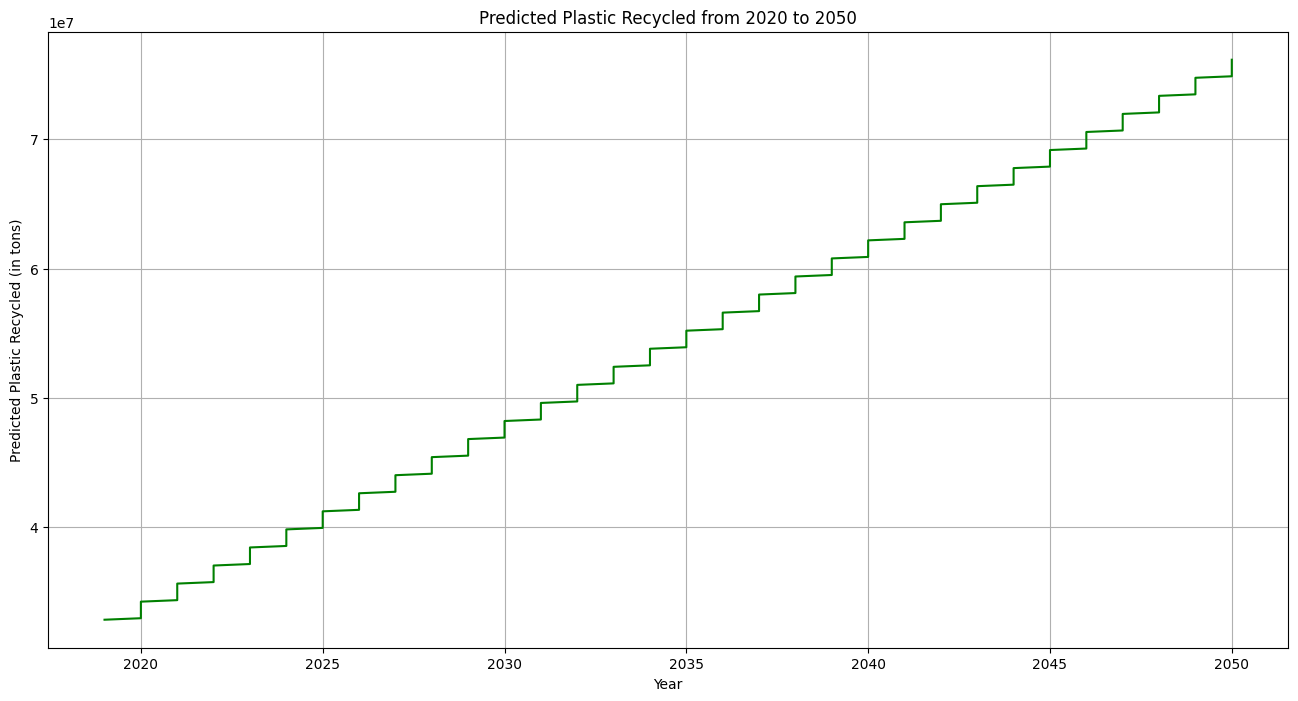

In [66]:
# Plot the predicted plastic recycled
plt.figure(figsize=(16, 8))
plt.plot(future_df_recycled['Year'], future_df_recycled['Predicted_Plastic_Recycled_Adjusted'], color='green', label='Predicted Plastic Recycled')

# Set the title and axis labels
plt.title('Predicted Plastic Recycled from 2020 to 2050')
plt.xlabel('Year')
plt.ylabel('Predicted Plastic Recycled (in tons)')

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()




---


# **JUNÇÃO DOS RESULTADOS**

## **Tratamento**

In [67]:
# Tirando colunas desnecessárias

future_df_leakage.drop(['Predicted_Plastic_Leakage'], axis=1, inplace=True )
future_df_leakage.drop(['Time'], axis=1, inplace=True )

In [68]:
# Adicionando as predições dos outros dataframes ao primeiro, em suas respectivas colunas

future_df_leakage['Annual Production'] = future_df_production['Predicted_Plastic_Production_Adjusted']
future_df_leakage['Recycled Plastic'] = future_df_recycled['Predicted_Plastic_Recycled_Adjusted']

In [69]:
# Ajustando os nomes das colunas

future_df_leakage.columns = ['Year', 'Month', 'Plastic Leakage (Ocean)', 'Annual Plastic Production', 'Recycled Plastic']

In [70]:
# Criando colunas percentuais dos valores de vazamento de plástico e reciclagem, em relação ao total de produção de plástico (100%)

future_df_leakage['Plastic Leakage Percentage (%)'] = (future_df_leakage['Plastic Leakage (Ocean)'] / future_df_leakage['Annual Plastic Production']) * 100
future_df_leakage['Recycled Plastic Percentage (%)'] = (future_df_leakage['Recycled Plastic'] / future_df_leakage['Annual Plastic Production']) * 100



---


# **RESULTADO FINAL**





In [71]:
future_df_leakage

,Year,Month,Plastic Leakage (Ocean),Annual Plastic Production,Recycled Plastic,Plastic Leakage Percentage (%),Recycled Plastic Percentage (%)
0,2019,12,30408747,459746019,32829023,6.614249,7.140687
1,2020,1,30502643,460754577,32945510,6.620150,7.150338
2,2020,2,30596538,461763134,33061996,6.626024,7.159947
3,2020,3,30690434,462771691,33178483,6.631874,7.169514
4,2020,4,30784330,463780248,33294970,6.637698,7.179040
...,...,...,...,...,...,...,...
368,2050,8,64962429,830895087,75696164,7.818367,9.110195
369,2050,9,65056325,831903644,75812651,7.820176,9.113153
370,2050,10,65150221,832912201,75929138,7.821979,9.116103
371,2050,11,65244117,833920758,76045624,7.823779,9.119047


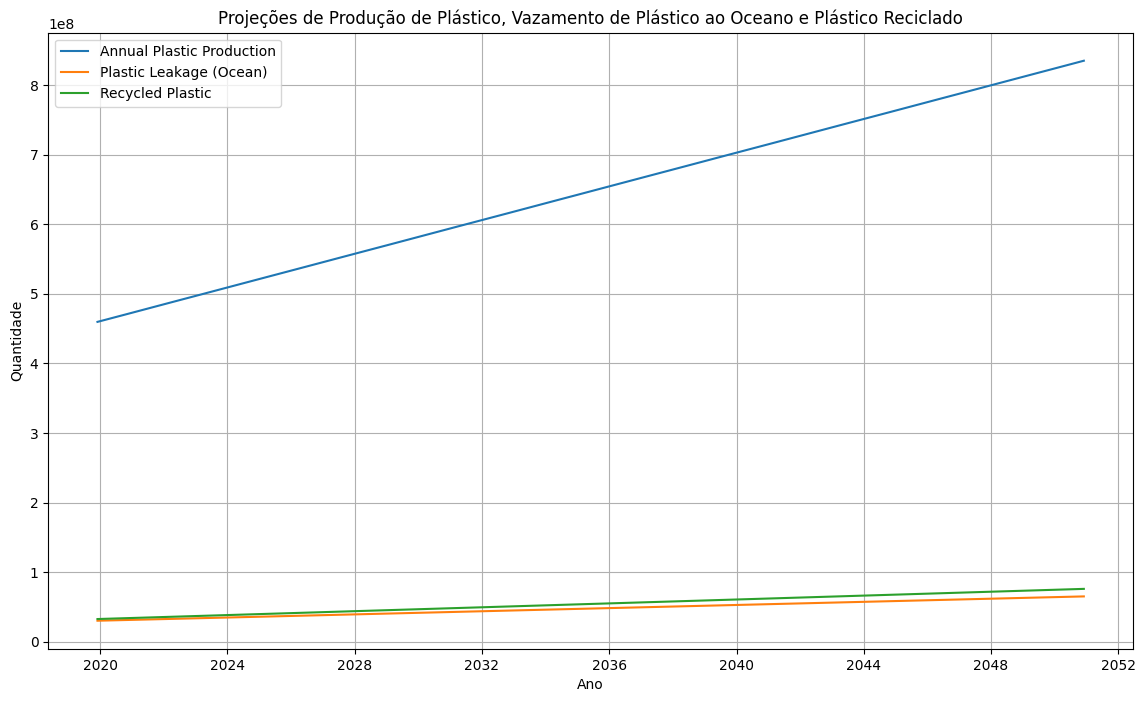

In [72]:
# Criar a coluna 'Date' para plotagem
future_df_leakage['Date'] = pd.to_datetime(future_df_leakage[['Year', 'Month']].assign(DAY=1))

# Configurar o gráfico
plt.figure(figsize=(14, 8))

# Plotar cada série temporal
plt.plot(future_df_leakage['Date'], future_df_leakage['Annual Plastic Production'], label='Annual Plastic Production')
plt.plot(future_df_leakage['Date'], future_df_leakage['Plastic Leakage (Ocean)'], label='Plastic Leakage (Ocean)')
plt.plot(future_df_leakage['Date'], future_df_leakage['Recycled Plastic'], label='Recycled Plastic')

# Adicionar títulos e legendas
plt.title('Projeções de Produção de Plástico, Vazamento de Plástico ao Oceano e Plástico Reciclado')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()

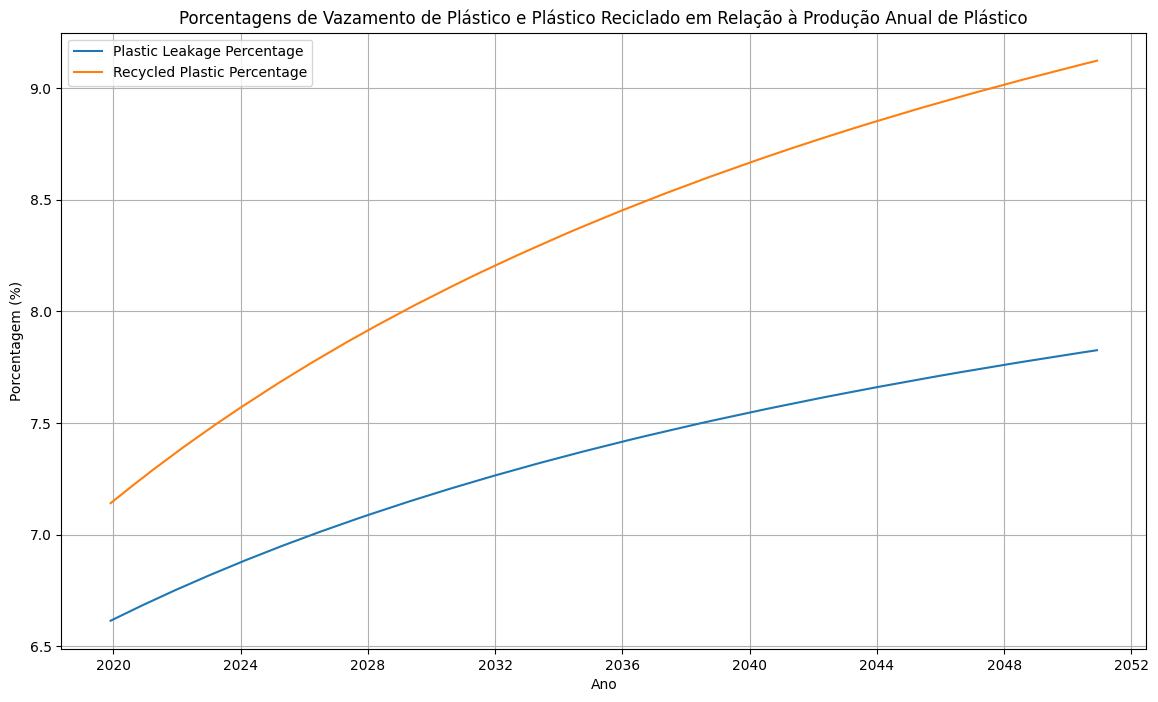

In [73]:
# Configurar o gráfico
plt.figure(figsize=(14, 8))

# Plotar cada série temporal de porcentagens
plt.plot(future_df_leakage['Date'], future_df_leakage['Plastic Leakage Percentage (%)'], label='Plastic Leakage Percentage')
plt.plot(future_df_leakage['Date'], future_df_leakage['Recycled Plastic Percentage (%)'], label='Recycled Plastic Percentage')

# Adicionar títulos e legendas
plt.title('Porcentagens de Vazamento de Plástico e Plástico Reciclado em Relação à Produção Anual de Plástico')
plt.xlabel('Ano')
plt.ylabel('Porcentagem (%)')
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()